# Periodic boundary and convex sets

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../../..')
from proximal.dynamicUOT import computeGeodesic
from proximal.grids import speed_and_growth
import ipywidgets as widgets
from ipywidgets import interact

## 1D Gaussian bump with periodic boundary (unconstrained)

# Set up

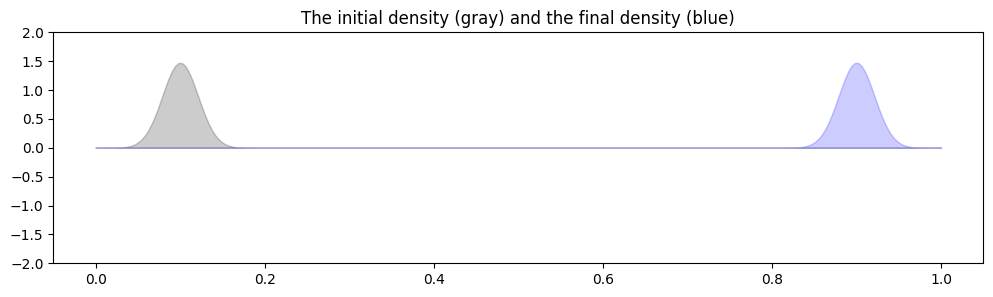

In [2]:
# Plotting initial and the final density
sigma = 0.03
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, 0.1, sigma, 1)  # Initial density
rho_1 = gauss(X, 0.9, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 20
rho_1 /= np.sum(rho_1) / 20

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-2, 2)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

In [3]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, niter=3000, periodic = True)

In [4]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :], "k", label=r'$v_t$')
    plt.plot(X, g[t, :], "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 1, ylim[0], ylim[1]])
    plt.show()

v,g = speed_and_growth(x.V)
plot_elements1 = [x.copy(), v.copy(), g.copy(), X.copy(), rho_0.copy(), rho_1.copy(), [-2,2], r"(grey) $\rho_0$, (blue) $\rho_1$ (red) $\rho_t$ (green) $g_t$ (dark) $v_t$"]
interact(lambda t: plot_1D(t, *plot_elements1), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

## 1D Gaussian bump with periodic boundary (Total mass constraint)

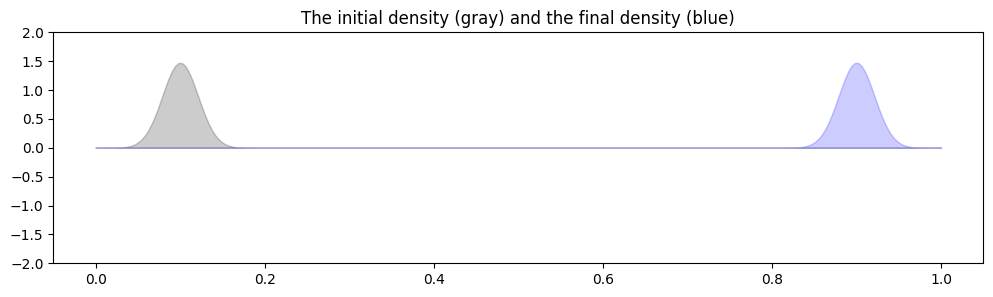

In [5]:
# Plotting initial and the final density
sigma = 0.03
T = 15
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, 0.1, sigma, 1)  # Initial density
rho_1 = gauss(X, 0.9, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 20
rho_1 /= np.sum(rho_1) / 20

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-2, 2)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

H = np.ones((T, K))  # Initialize the H function
t = np.linspace(0, 1, T)  # Time discretization
F = 20 * 4 * ((t - 0.5) ** 2) /256  # Example function for F

In [6]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, H=H, F=F, niter=3000, periodic = True, big_matrix=True)

c:\Users\mao17\Workspace\pdot\venv\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


In [7]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :], "k", label=r'$v_t$')
    plt.plot(X, g[t, :], "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 1, ylim[0], ylim[1]])
    plt.show()

v,g = speed_and_growth(x.V)
plot_elements1 = [x.copy(), v.copy(), g.copy(), X.copy(), rho_0.copy(), rho_1.copy(), [-2,2], r"(grey) $\rho_0$, (blue) $\rho_1$ (red) $\rho_t$ (green) $g_t$ (dark) $v_t$"]
interact(lambda t: plot_1D(t, *plot_elements1), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

# Convex set

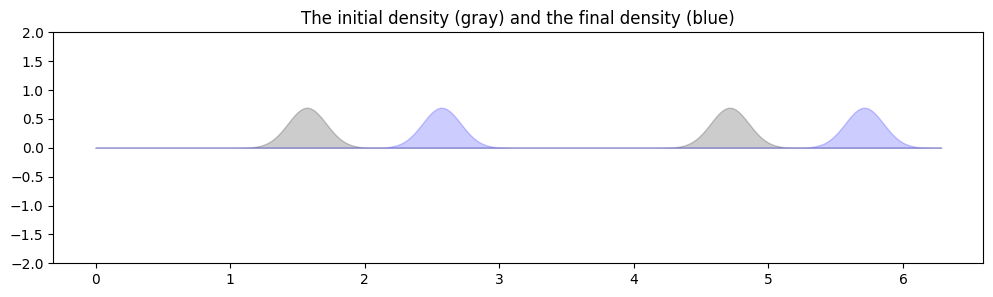

In [2]:
# Plotting initial and the final density
sigma = 0.2
T = 15
K = 256
X = np.linspace(0, 2 * np.pi, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, np.pi/2, sigma, 1) + gauss(X, 3 * np.pi/2, sigma, 1)  # Initial density
rho_1 = gauss(X, np.pi/2 + 1.0, sigma, 1) + gauss(X, 3 * np.pi/2 + 1.0, sigma, 1)  # Initial density
#rho_1 = gauss(X, np.pi/2 , sigma, 1) + gauss(X, np.pi/2 + 2 * np.pi/3, sigma, 1) + gauss(X, np.pi/2 + 4 * np.pi/3, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 20
rho_1 /= np.sum(rho_1) / 20

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-2, 2)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

theta = np.linspace(0, 2 * np.pi, K)  # Discretization of the time-space domain
H = [np.vstack([np.cos(theta)] * T), np.vstack([np.sin(theta)] * T)]  # Initialize the H function
F = [np.zeros(T), np.zeros(T)]  # Initialize the F function

In [3]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=1.0, H=H, F=F, niter=5000, periodic = True, big_matrix=True)

c:\Users\mao17\Workspace\pdot\venv\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


In [4]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :], "k", label=r'$v_t$')
    plt.plot(X, g[t, :], "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 2 * np.pi, ylim[0], ylim[1]])
    plt.show()

v,g = speed_and_growth(x.V)
plot_elements1 = [x.copy(), v.copy(), g.copy(), X.copy(), rho_0.copy(), rho_1.copy(), [-2,2], r"(grey) $\rho_0$, (blue) $\rho_1$ (red) $\rho_t$ (green) $g_t$ (dark) $v_t$"]
interact(lambda t: plot_1D(t, *plot_elements1), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

In [5]:
np.sum(H[0] * x.V.D[0], axis=1)  # Check the first component of H against the geodesic

array([-2.76949196e-05, -8.38950880e-05, -1.32896875e-04, -1.71589568e-04,
       -2.06628133e-04, -2.38604350e-04, -2.67870613e-04, -2.97235735e-04,
       -3.28864349e-04, -3.62024414e-04, -3.94434780e-04, -4.16117642e-04,
       -3.94263733e-04, -3.05050455e-04, -1.36971823e-04])

In [6]:
np.sum(H[1] * x.V.D[0], axis=1)  # Check the second component of H against the geodesic

array([-9.10767303e-05, -2.89326348e-04, -4.96647391e-04, -6.95637356e-04,
       -8.89880116e-04, -1.07763484e-03, -1.25852354e-03, -1.43045855e-03,
       -1.59154468e-03, -1.73851779e-03, -1.83924845e-03, -1.71230063e-03,
       -1.14416753e-03, -4.70098564e-04, -1.55821105e-04])

In [7]:
np.sum(H[0] * rho_1, axis=1)


array([-3.02159501e-05, -3.02159501e-05, -3.02159501e-05, -3.02159501e-05,
       -3.02159501e-05, -3.02159501e-05, -3.02159501e-05, -3.02159501e-05,
       -3.02159501e-05, -3.02159501e-05, -3.02159501e-05, -3.02159501e-05,
       -3.02159501e-05, -3.02159501e-05, -3.02159501e-05])

In [8]:
np.sum(H[1] * rho_1, axis=1)


array([-0.00010587, -0.00010587, -0.00010587, -0.00010587, -0.00010587,
       -0.00010587, -0.00010587, -0.00010587, -0.00010587, -0.00010587,
       -0.00010587, -0.00010587, -0.00010587, -0.00010587, -0.00010587])